prediction using random forest classifier

import the dependencies

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score

In [7]:
from google.colab import drive
drive.mount("/content/drive")

Mounted at /content/drive


data collection and processing

In [8]:
wine_dataset = pd.read_csv('/content/drive/MyDrive/self_projects/wine_quality/winequality-red.csv')

In [9]:
wine_dataset.head()

fixed acidity  volatile acidity  citric acid  residual sugar  chlorides  \
0            7.4              0.70         0.00             1.9      0.076   
1            7.8              0.88         0.00             2.6      0.098   
2            7.8              0.76         0.04             2.3      0.092   
3           11.2              0.28         0.56             1.9      0.075   
4            7.4              0.70         0.00             1.9      0.076   

   free sulfur dioxide  total sulfur dioxide  density    pH  sulphates  \
0                 11.0                  34.0   0.9978  3.51       0.56   
1                 25.0                  67.0   0.9968  3.20       0.68   
2                 15.0                  54.0   0.9970  3.26       0.65   
3                 17.0                  60.0   0.9980  3.16       0.58   
4                 11.0                  34.0   0.9978  3.51       0.56   

   alcohol  quality  
0      9.4        5  
1      9.8        5  
2      9.8        5  
3      9.8        6  
4      9.4        5

In [11]:
wine_dataset.isnull().sum()

fixed acidity           0
volatile acidity        0
citric acid             0
residual sugar          0
chlorides               0
free sulfur dioxide     0
total sulfur dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
quality                 0
dtype: int64

In [12]:
wine_dataset.describe()

fixed acidity  volatile acidity  citric acid  residual sugar  \
count    1599.000000       1599.000000  1599.000000     1599.000000   
mean        8.319637          0.527821     0.270976        2.538806   
std         1.741096          0.179060     0.194801        1.409928   
min         4.600000          0.120000     0.000000        0.900000   
25%         7.100000          0.390000     0.090000        1.900000   
50%         7.900000          0.520000     0.260000        2.200000   
75%         9.200000          0.640000     0.420000        2.600000   
max        15.900000          1.580000     1.000000       15.500000   

         chlorides  free sulfur dioxide  total sulfur dioxide      density  \
count  1599.000000          1599.000000           1599.000000  1599.000000   
mean      0.087467            15.874922             46.467792     0.996747   
std       0.047065            10.460157             32.895324     0.001887   
min       0.012000             1.000000              6.000000     0.990070   
25%       0.070000             7.000000             22.000000     0.995600   
50%       0.079000            14.000000             38.000000     0.996750   
75%       0.090000            21.000000             62.000000     0.997835   
max       0.611000            72.000000            289.000000     1.003690   

                pH    sulphates      alcohol      quality  
count  1599.000000  1599.000000  1599.000000  1599.000000  
mean      3.311113     0.658149    10.422983     5.636023  
std       0.154386     0.169507     1.065668     0.807569  
min       2.740000     0.330000     8.400000     3.000000  
25%       3.210000     0.550000     9.500000     5.000000  
50%       3.310000     0.620000    10.200000     6.000000  
75%       3.400000     0.730000    11.100000     6.000000  
max       4.010000     2.000000    14.900000     8.000000

In [13]:
wine_dataset["quality"].value_counts()

quality
5    681
6    638
7    199
4     53
8     18
3     10
Name: count, dtype: int64

data visualization

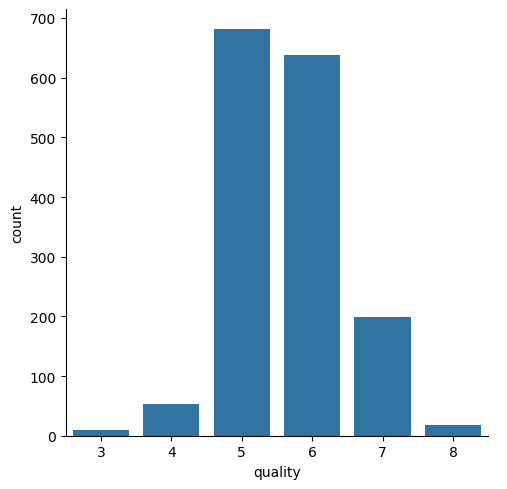

In [14]:
sns.catplot(x = "quality", data = wine_dataset, kind = "count")

<Axes: xlabel='quality', ylabel='volatile acidity'>

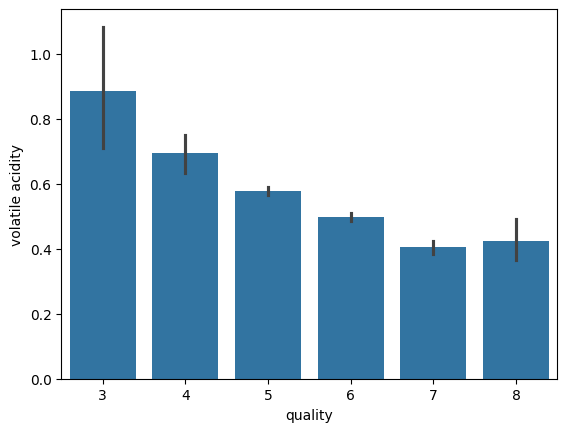

In [16]:
sns.barplot(x = "quality", y = "volatile acidity", data = wine_dataset)
# we can see that as the quality increases the volatile acidity decreases, they are inversely proportional

<Axes: xlabel='quality', ylabel='citric acid'>

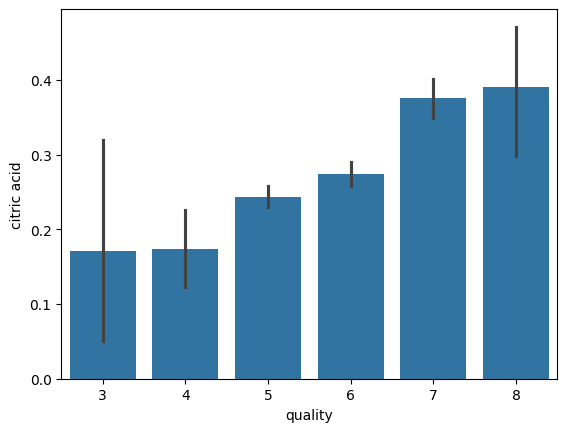

In [18]:
sns.barplot(x = "quality", y = "citric acid", data = wine_dataset)
# wine quality and citric acid are directly proportional

<Axes: xlabel='quality', ylabel='alcohol'>

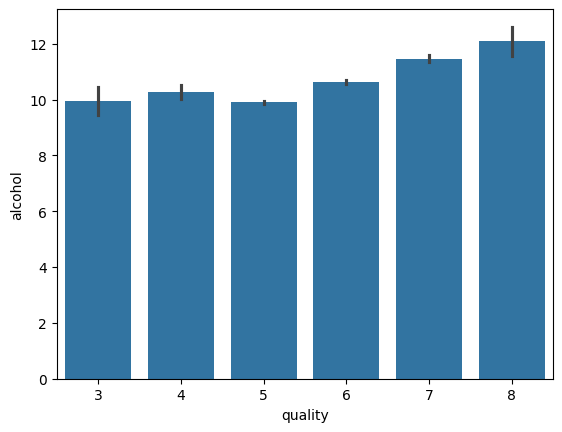

In [20]:
sns.barplot(x = "quality", y = "alcohol", data = wine_dataset)
# they are directly proportional but with not a high magnitude

<Axes: xlabel='quality', ylabel='residual sugar'>

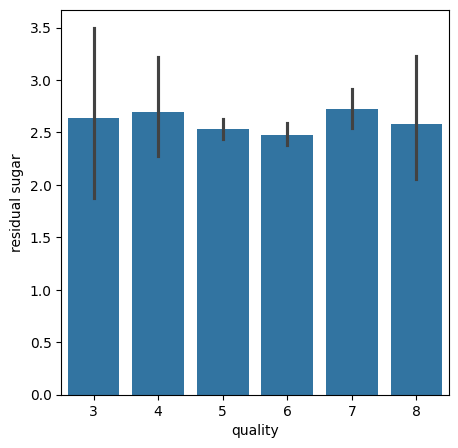

In [24]:
sns.barplot(x = "quality", y = "residual sugar", data = wine_dataset)
# no relation is found

building corelation among input features

In [25]:
corelation = wine_dataset.corr()

<Axes: >

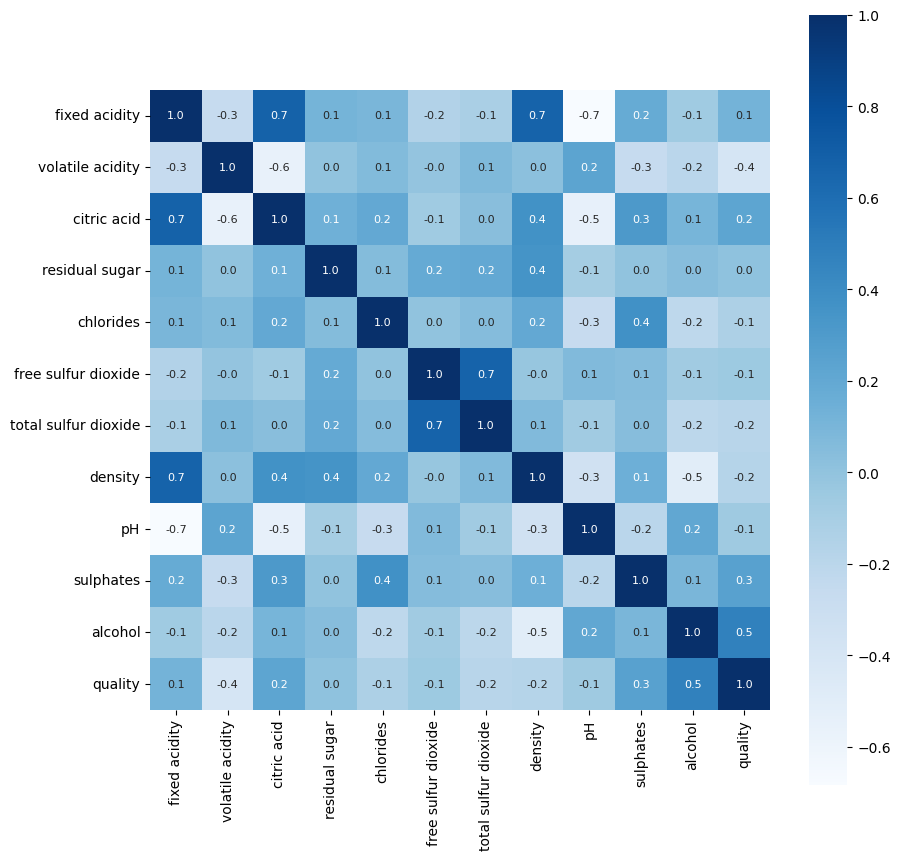

In [28]:
plt.figure(figsize = (10, 10)) # we would consider the which are more related (-vely or +vely)
sns.heatmap(data = corelation, cbar = True, square = True, fmt = ".1f", annot = True, annot_kws = {"size": 8}, cmap = "Blues")

splitting the data into input features and label

In [29]:
X = wine_dataset.drop("quality", axis = 1)

In [30]:
y = wine_dataset["quality"]

label binarization

In [32]:
y = y.apply(lambda y_values: 1 if y_values >= 7 else 0)
# there are 5 categories so we are using conditions to classify them into 2, if greater than or equal to 7 assign good wine
# quality (1) otherwise bad (0)

In [33]:
y

0       0
1       0
2       0
3       0
4       0
       ..
1594    0
1595    0
1596    0
1597    0
1598    0
Name: quality, Length: 1599, dtype: int64

In [35]:
y.value_counts() # the category becomes too biased, better to use SMOTE

quality
0    1382
1     217
Name: count, dtype: int64

splitting the data into training and testing data

In [36]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, stratify = y, random_state = 3)

In [37]:
X.shape, X_train.shape, X_test.shape

((1599, 11), (1279, 11), (320, 11))

In [38]:
y.shape, y_train.shape, y_test.shape

((1599,), (1279,), (320,))

building a model

In [39]:
model = RandomForestClassifier()


In [40]:
model.fit(X_train, y_train)

RandomForestClassifier()

model prediction

In [41]:
y_pred = model.predict(X_test)

checking out the accuracy

In [42]:
accuracy_score(y_test, y_pred)

0.909375

building a predictive system

In [46]:
# input_data = (7.3,0.65,0.0,1.2,0.065,15.0,21.0,0.9946,3.39,0.47,10.0) good as per the label, it is 7
input_data = (7.5,0.5,0.36,6.1,0.071,17.0,102.0,0.9978,3.35,0.8,10.5) # bad quality as per the label, it is 5


input_data_np_arr = np.asarray(input_data)

input_data_reshaped = input_data_np_arr.reshape(1,-1)

prediction = model.predict(input_data_reshaped)
print(prediction[0])

if prediction[0] == 1:
  print("Good wine quality")
else:
  print("Bad wine quality")

0
Bad wine quality


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(
